# Demo German Credit dataset

Author: <alberto.suarez@uam.es> 


In [4]:
# The packages imported need to be installed in the Python environment.

import pandas as pd # data analysis tools
import matplotlib.pyplot as plt # plotting utilities
import seaborn as sns # statistical data visualization
%matplotlib inline

# See also: https://www.kaggle.com/code/diegoeliascosta/soen691-germancreditreport

In [5]:
# Load dataset

data = pd.read_csv('./data/german_credit_data.csv', sep=';')
# Source: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

print (data.columns)
data.head(10)

Index(['default', 'account_check_status ', 'duration_in_month ',
       'credit_history ', 'purpose ', 'credit_amount ', 'savings ',
       'present_emp_since ', 'installment_as_income_perc ',
       'personal_status_sex ', 'other_debtors ', 'present_res_since ',
       'property ', 'age ', 'other_installment_plans ', 'housing ',
       'credits_this_bank ', 'job ', 'people_under_maintenance ', 'telephone ',
       'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [6]:
# Load dataset with numerically encoded attributes and class labels
data_numeric = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
data_numeric.head(10)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Class
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
5,4,36,2,91,5,3,3,4,4,35,...,0,0,1,0,0,0,0,1,0,1
6,4,24,2,28,3,5,3,4,2,53,...,0,0,1,0,0,1,0,0,1,1
7,2,36,2,69,1,3,3,2,3,35,...,0,1,1,0,1,0,0,0,0,1
8,4,12,2,31,4,4,1,4,1,61,...,0,0,1,0,0,1,0,1,0,1
9,2,30,4,52,1,1,4,2,3,28,...,1,0,1,0,0,1,0,0,0,2


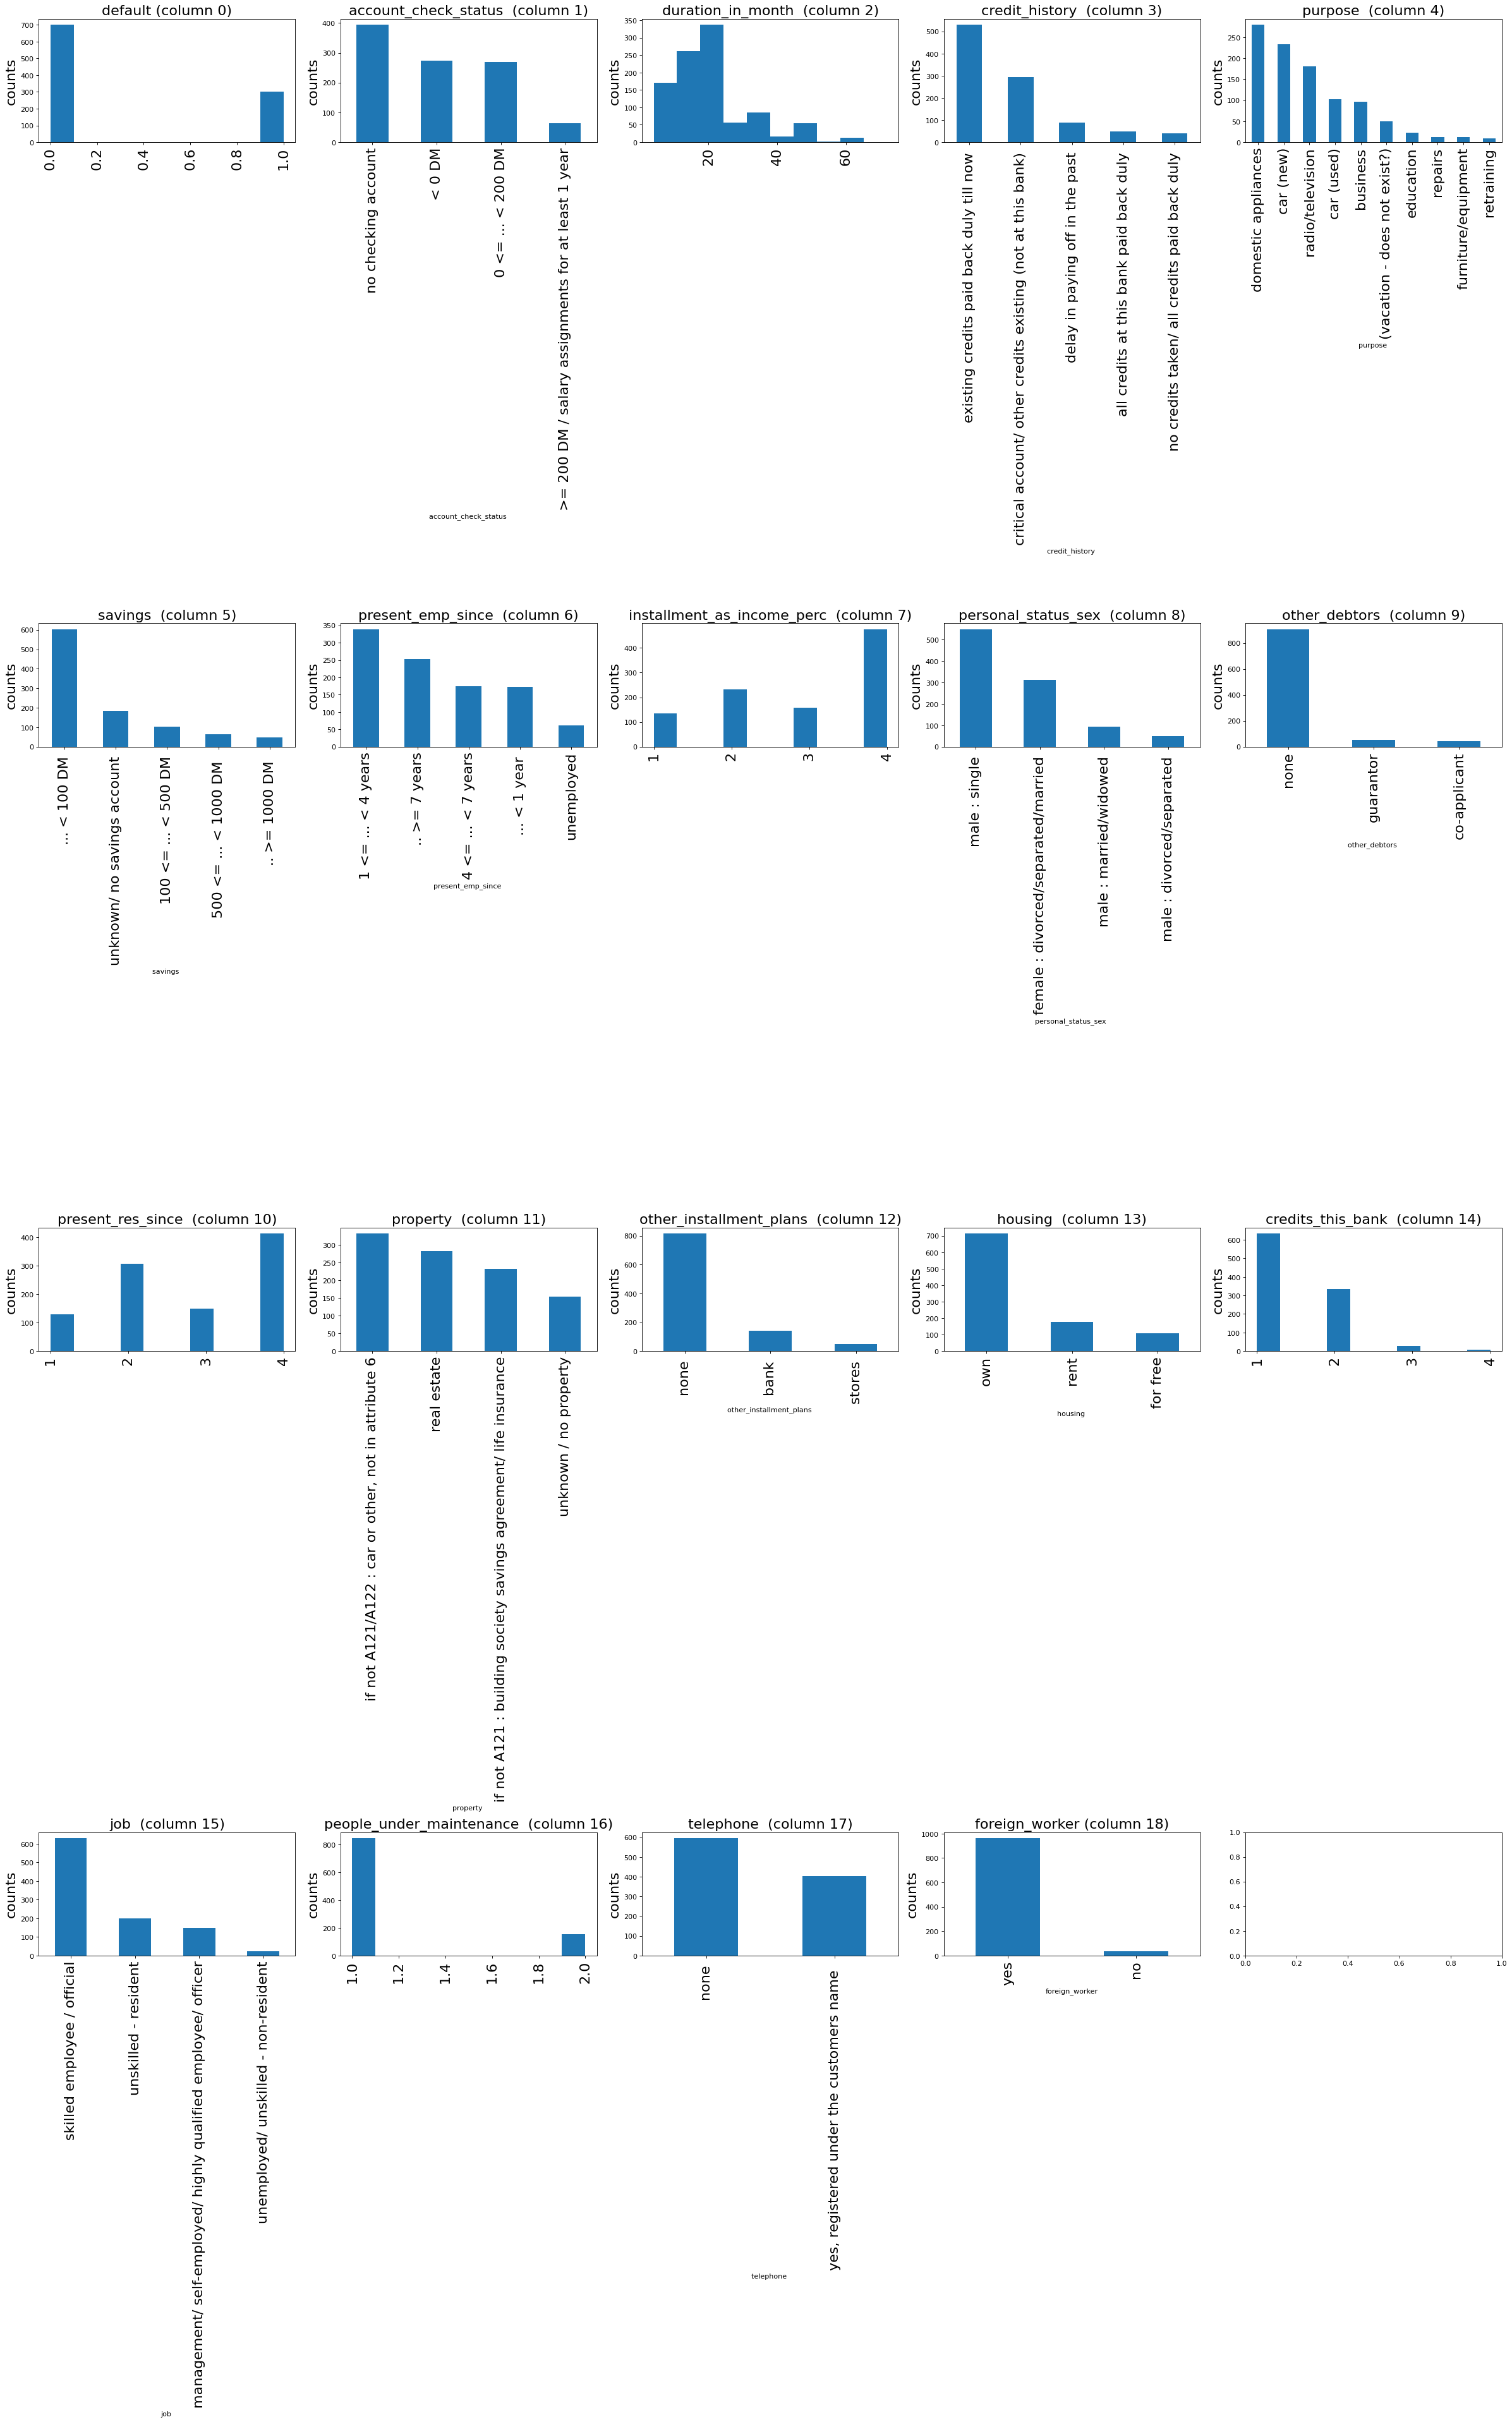

In [7]:
# Data exploration

import numpy as np

n_plots_per_row = 5
    
n_unique = data.nunique()

# For displaying purposes, pick attributes that have between 1 and 50 unique values
data_plot = data[[col for col in data if n_unique[col] > 1 and n_unique[col] < 50]] 

n_examples, n_attributes = np.shape(data_plot)
attribute_names = list(data_plot)

n_rows_fig = int(np.ceil((n_attributes - 1) / n_plots_per_row))

fig, axes = plt.subplots(
    nrows=n_rows_fig,
    ncols=n_plots_per_row,
    figsize=(6 * n_plots_per_row, 12 * n_rows_fig), 
    dpi=80, 
    facecolor='w', 
    edgecolor='k',
)

fontsize = 20

for index_attribute in range(n_attributes):
    row_plot, column_plot = np.divmod(index_attribute, n_plots_per_row) 
    ax = axes[row_plot, column_plot]

    values_plot = data_plot.iloc[:, index_attribute]
    if (np.issubdtype(type(values_plot.iloc[0]), np.number)):
        values_plot.plot.hist(ax=ax)
    else:
        values_plot = values_plot.value_counts()
        values_plot.plot.bar(ax=ax)

    # ax.xaxis.set_tick_params(rotation=90)
    ax.tick_params(axis='x', rotation=90, labelsize=fontsize)
    ax.set_ylabel('counts', fontsize=fontsize)
    ax.set_title(
        '{} (column {})'.format(
            attribute_names[index_attribute], 
            index_attribute
        ), 
        fontsize=fontsize,
    )

plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

In [8]:
# Data encoding

data['account_check_status '] = data['account_check_status '].map(
    {'no checking account': 0,
     '< 0 DM': 1,
     '0 <= ... < 200 DM': 2,
     '>= 200 DM / salary assignments for at least 1 year': 3}
)
data.head(10)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,0,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,0,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,0,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,2,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,0,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,2,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


<Figure size 640x480 with 0 Axes>

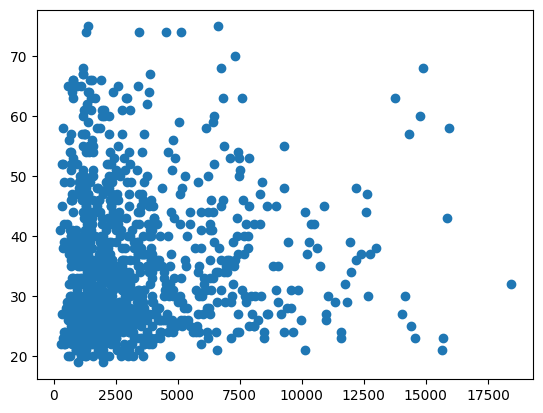

<Figure size 640x480 with 0 Axes>

In [9]:
# Correlations between attributes

plt.scatter(data['credit_amount '], data['age '])
plt.figure()

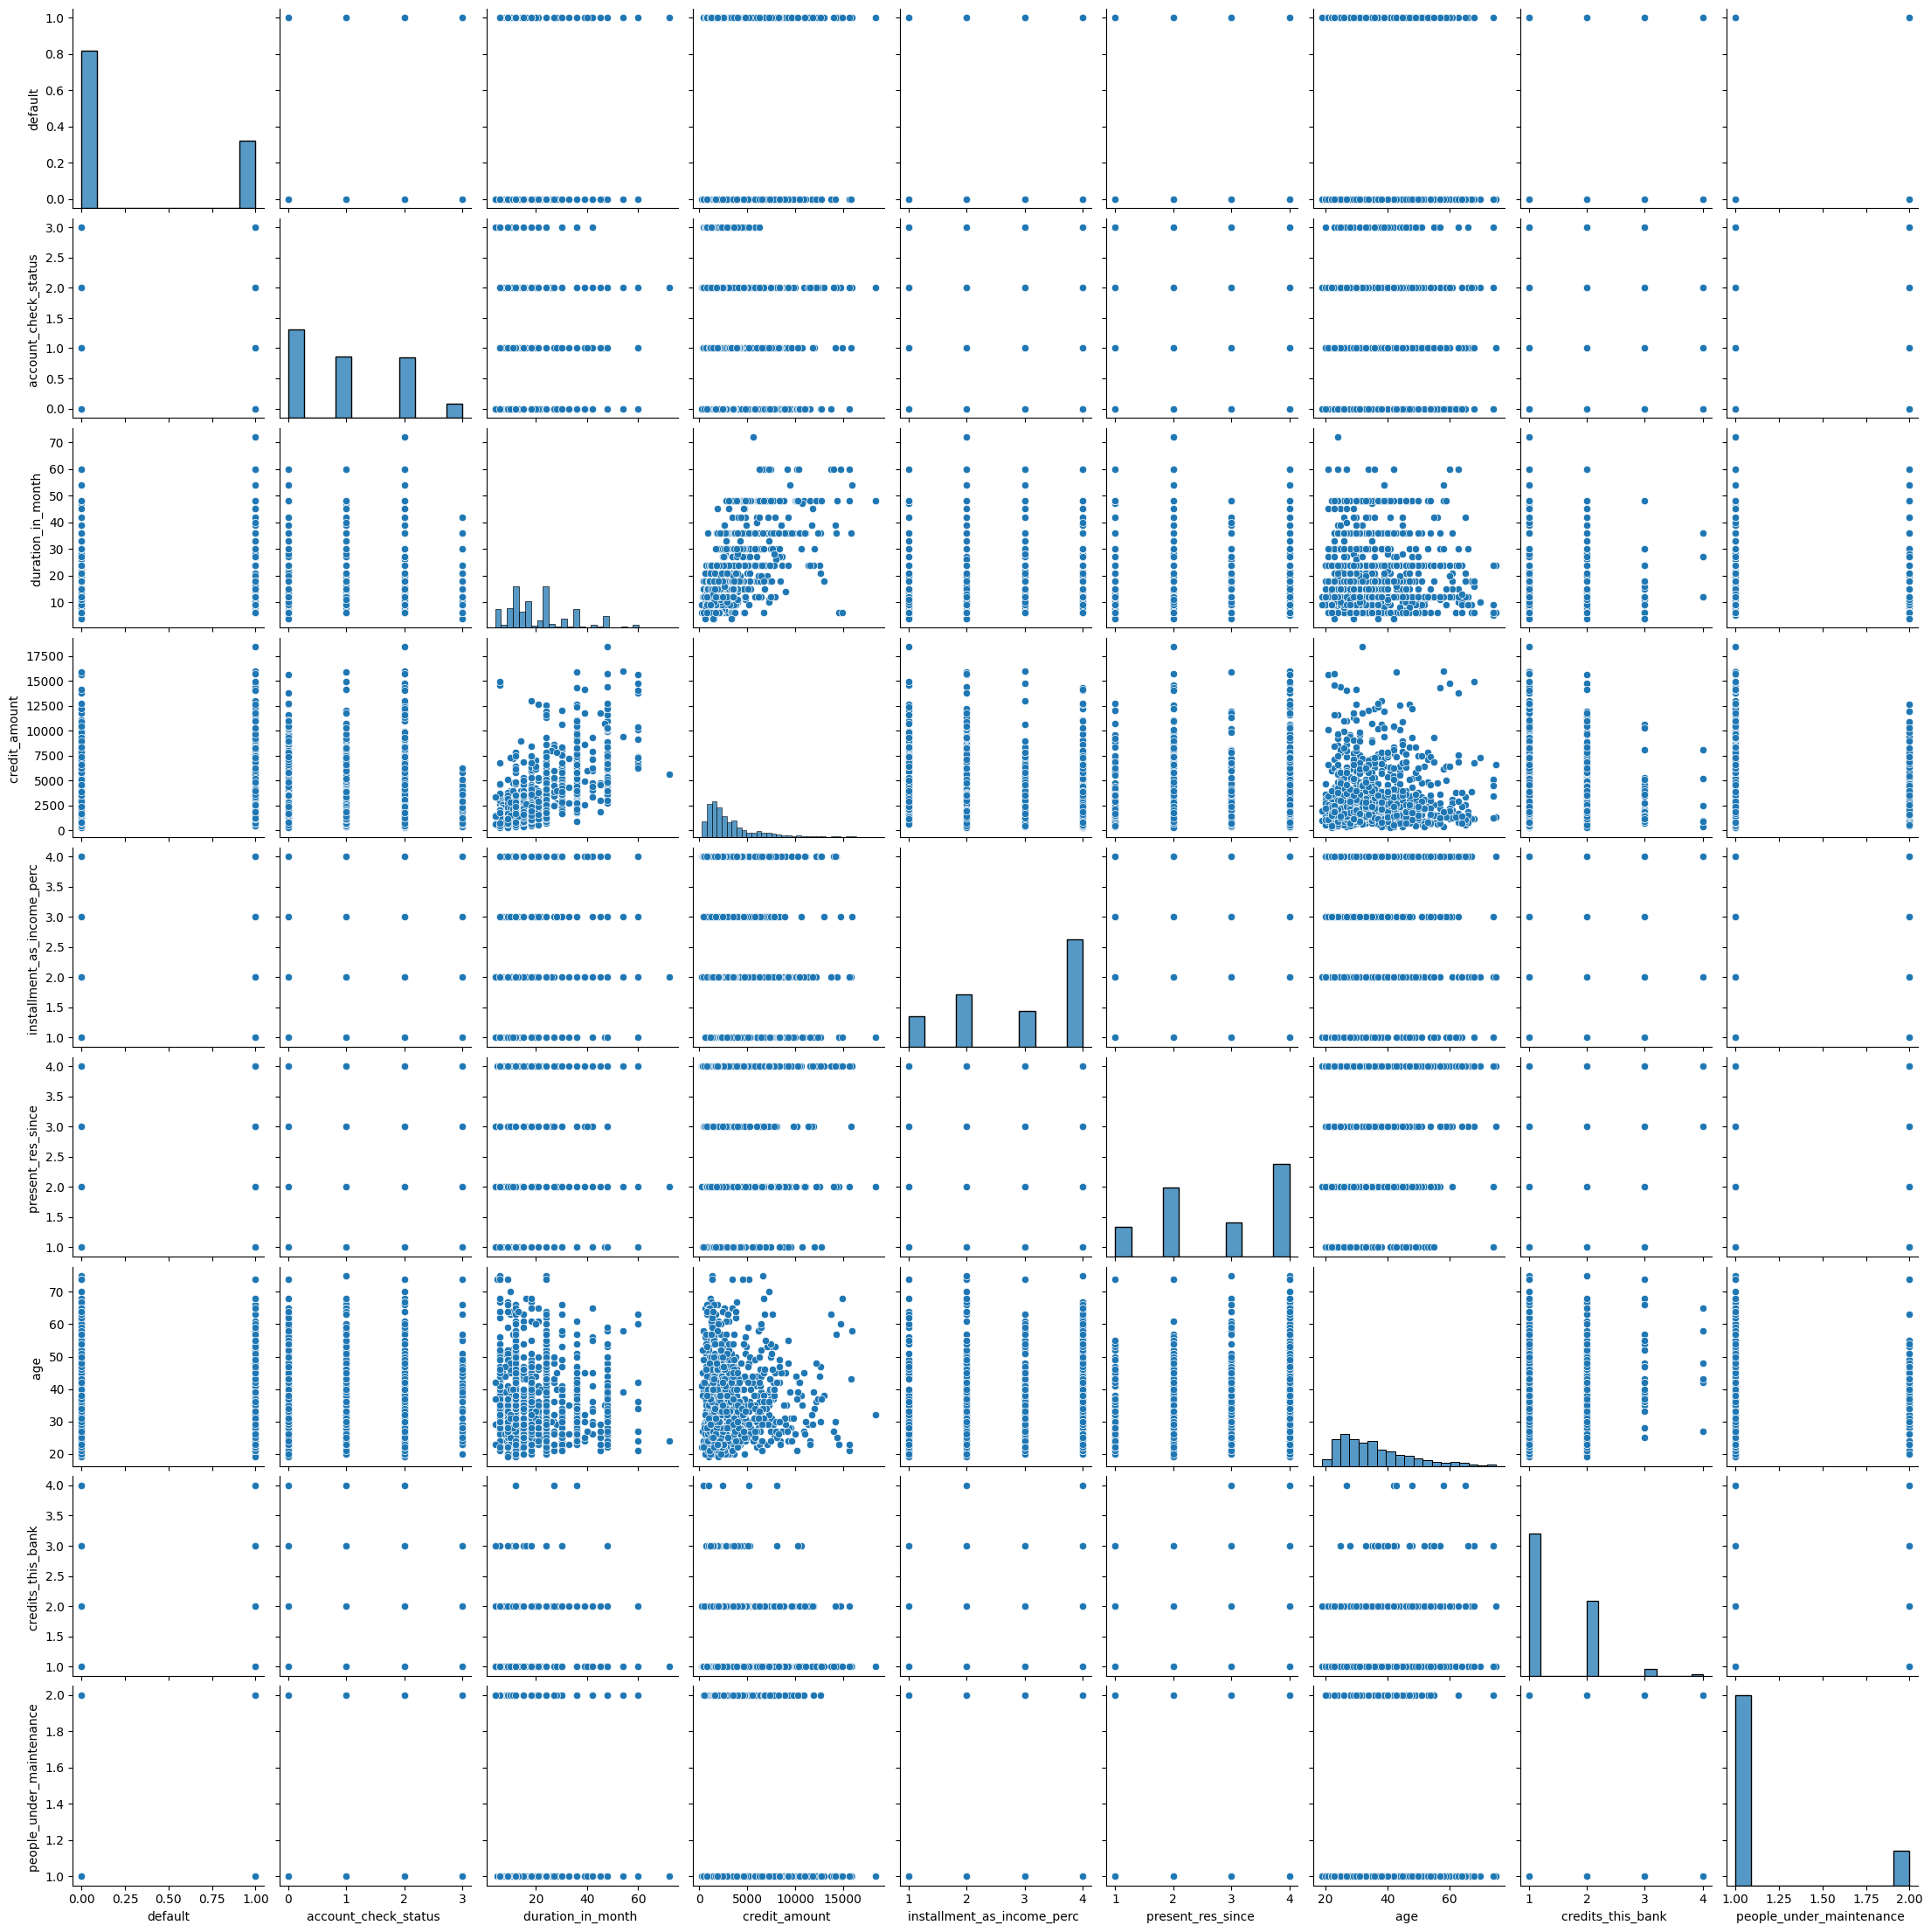

In [10]:
sns.pairplot(data)

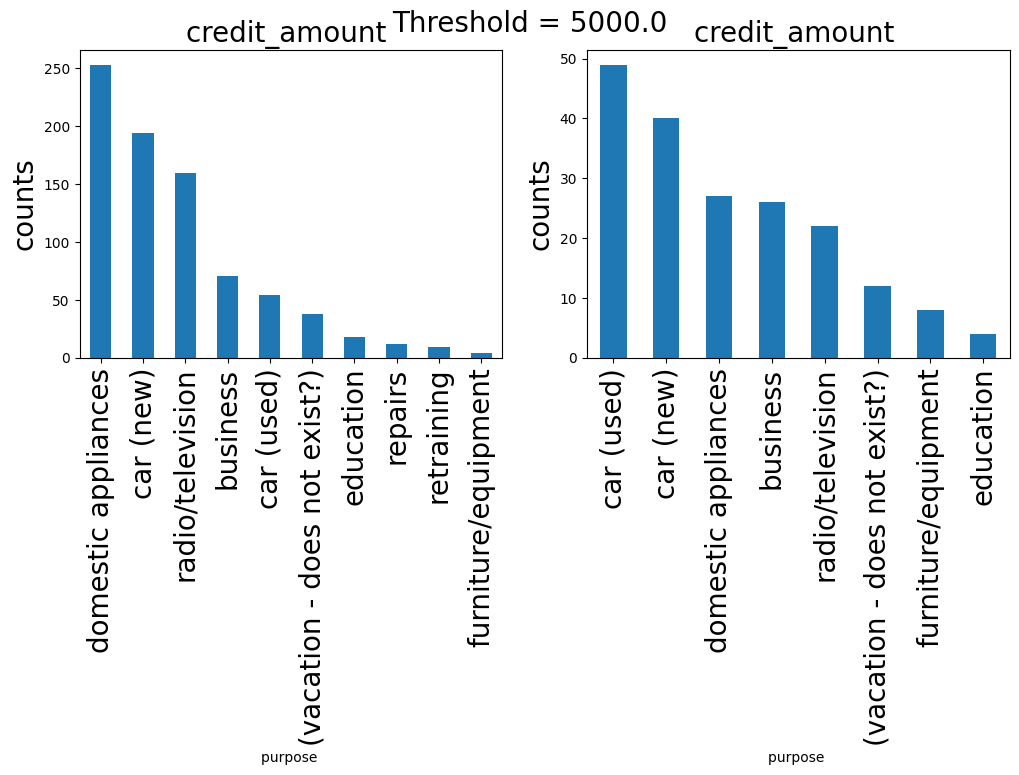

In [11]:
# Analyzing segmented data

attribute_name = 'credit_amount '
threshold = 5000.0

masks = [data[attribute_name] <= threshold, data[attribute_name] > threshold]

fig, axes = plt.subplots(nrows=1, ncols=len(masks), figsize=(12, 4))

for mask, ax in zip(masks, axes):
    data_plot = data[mask]    
    values_plot = data_plot.loc[:, 'purpose ']

    if (np.issubdtype(type(values_plot.iloc[0]), np.number)):
        values_plot.plot.hist(values_plot, ax=ax)
    else:
        values_plot = values_plot.value_counts()
        values_plot.plot.bar(ax=ax)

    ax.tick_params(axis='x', rotation=90, labelsize=fontsize)
    ax.set_ylabel('counts', fontsize=fontsize)
    ax.set_title('{}'.format(attribute_name), fontsize=fontsize)

fig.suptitle('Threshold = {}'.format(threshold), fontsize=fontsize)
    
plt.show()

/home/jorge/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


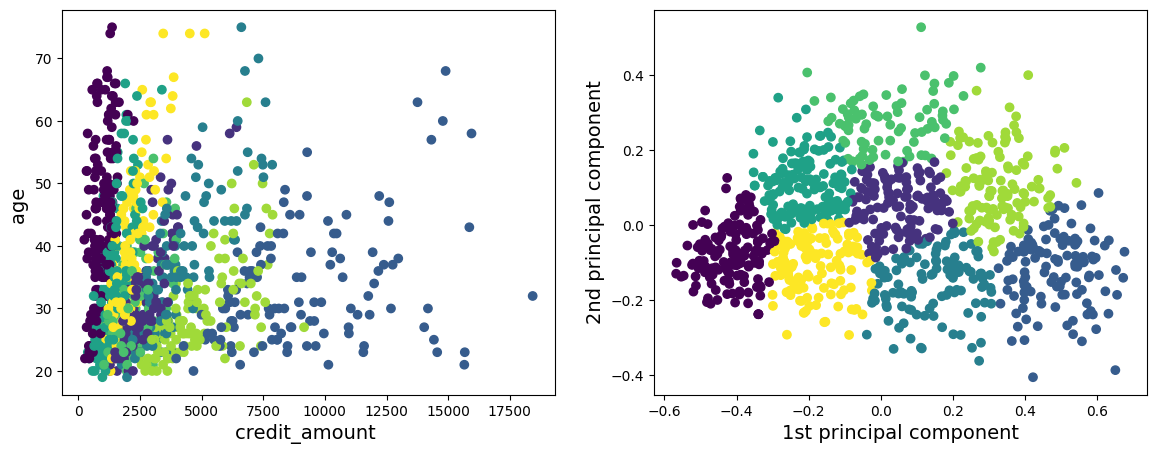

In [13]:
# Clustering

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import normalize


X_norm = normalize(data_numeric);
y = KMeans().fit_predict(X_norm)

"""
spectral = SpectralClustering(
        n_clusters=8, eigen_solver='arpack',
        affinity="nearest_neighbors")

y = spectral.fit_predict(X_norm)

"""

# Dimensionality reduction PCA

# linear PCA
# X_PCA = PCA(n_components=10).fit_transform(X_norm, 2);

# Nonlinear (kernel PCA)
gamma = 100000
X_PCA = KernelPCA(n_components=10, gamma=gamma).fit_transform(X_norm, 2);

# Display clusters

fix, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
x1_attribute = 'credit_amount '
x2_attribute = 'age '

fontsize = 14

axs[0].scatter(data[x1_attribute], data[x2_attribute], c=y)
axs[0].set_xlabel(x1_attribute, fontsize=fontsize)
axs[0].set_ylabel(x2_attribute, fontsize=fontsize)

axs[1].scatter(X_PCA[:, 0], X_PCA[:, 1], c=y)
axs[1].set_xlabel('1st principal component', fontsize=fontsize)
axs[1].set_ylabel('2nd principal component', fontsize=fontsize)

plt.show()